# Qiskit-Beispiele für die c't 20/25

## Erste Schritte: Ein Qubit

### Initialisierung

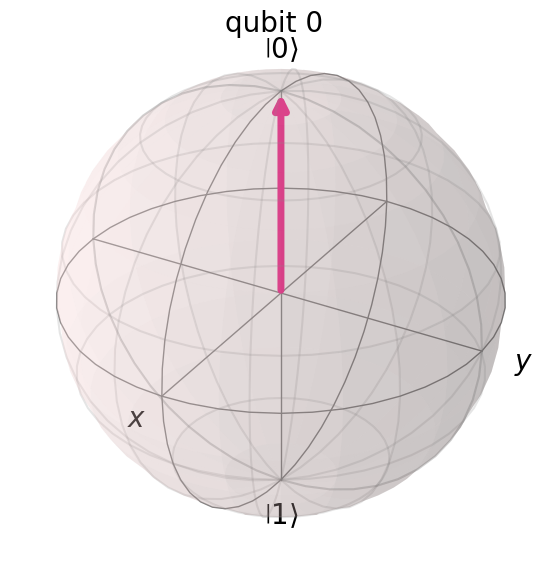

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector

# Erstelle einen Quantenschaltkreis mit einem Qubit
circ = QuantumCircuit(1)

# Zeichne die Bloch-Kugel-Darstellung des Zustandsvektors
plot_bloch_multivector(circ, figsize=(6,6), font_size=20)

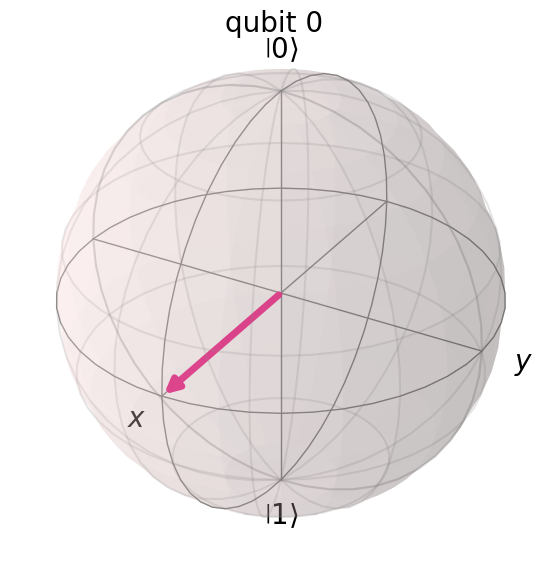

In [2]:
# Hadamard-Gatter auf Qubit 0 anwenden
circ.h(0)

# Zeichne die Bloch-Kugel-Darstellung des Zustandsvektors
plot_bloch_multivector(circ, figsize=(6,6), font_size=20)

In [3]:
from qiskit.quantum_info import Statevector

# Ausgabe des Zustandsvektors
state = Statevector(circ)
print("Zustandsvektor:", state.data)
state.draw('latex')

Zustandsvektor: [0.70710678+0.j 0.70710678+0.j]


<IPython.core.display.Latex object>

### Eine Messung simulieren

In [4]:
# Berechne die Wahrscheinlichkeit, das Qubit in 0 oder 1 zu messen
prob = state.probabilities()
print("Wahrscheinlichkeit, die Qubits im Zustand |0> oder |1> zu messen:", prob*100, "%")

Wahrscheinlichkeit, die Qubits im Zustand |0> oder |1> zu messen: [50. 50.] %


Messresultate: {'1': 5012, '0': 4988}


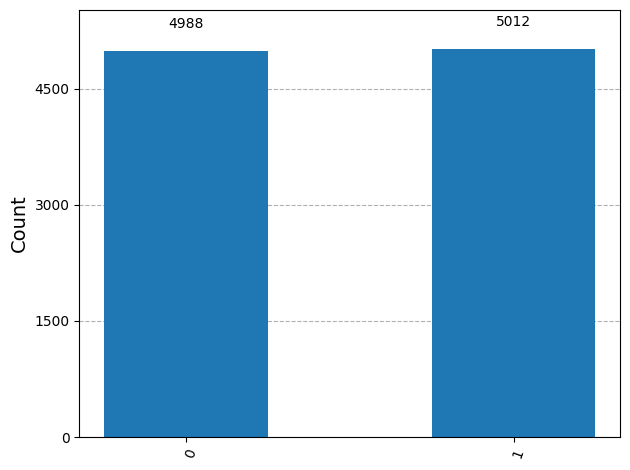

In [5]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Miss das Qubit
circ.measure_all()

# Simuliere 10.000 Messungen
simulator = AerSimulator(method='statevector')
result = simulator.run(circ, shots=10000).result()

# Speicher die Messresultate
counts = result.get_counts(circ)

# Ausgabe der Messresultate
print("Messresultate:", counts)
plot_histogram(counts)

## Zwei Qubits

### Initialisierung

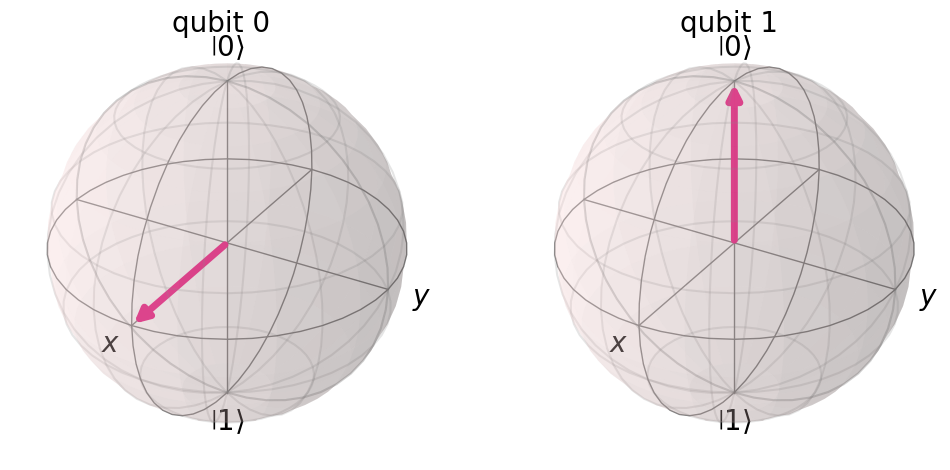

In [6]:
bell = QuantumCircuit(2)    # Quantenschaltkreis mit 2 Qubits
bell.h(0)                   # Hadamard-Gatter auf Qubit 0

# Zeichne die Bloch-Kugel-Darstellung des Zustandsvektors
plot_bloch_multivector(bell, figsize=(6,6), font_size=20)

In [7]:
# CNOT-Gatter mit Qubit 0 als Kontroll- und Qubit 1 als Ziel-Qubit
bell.cx(0, 1)  

# Ausgabe des Zustandsvektors
state2q = Statevector(bell)
print("Zustandsvektor:", state2q.data)
state2q.draw('latex')

Zustandsvektor: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


<IPython.core.display.Latex object>

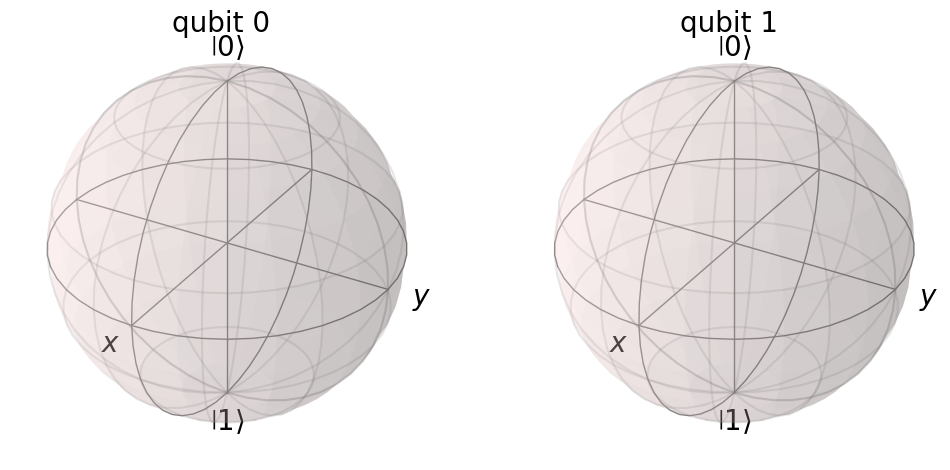

In [8]:
# Es ist nicht möglich, die Bloch-Sphären der zwei Qubits getrennt voneinander zu zeichenen – die Kugeln sind leer
plot_bloch_multivector(bell, figsize=(6,6), font_size=20)

### Berechnung der Messwahrscheinlichkeiten

In [9]:
# Berechne die Wahrscheinlichkeit, die Qubits in verschiedenen Zuständen zu messen
prob2q = state2q.probabilities()
print("Wahrscheinlichkeit, die Qubits im Zustand |00>, |01>, |10>, |11> zu messen:", prob2q*100, "%")

Wahrscheinlichkeit, die Qubits im Zustand |00>, |01>, |10>, |11> zu messen: [50.  0.  0. 50.] %


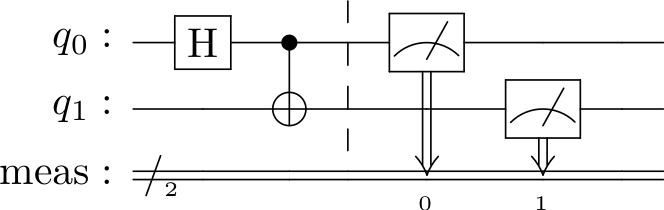

In [10]:
bell.measure_all()                  # Miss beide Qubits
bell.draw(output='latex', scale=2)  # Zeichne den Schaltkreis

### Simulation mit dem Aer Simulator

Messresultate: {'00': 5085, '11': 4915}


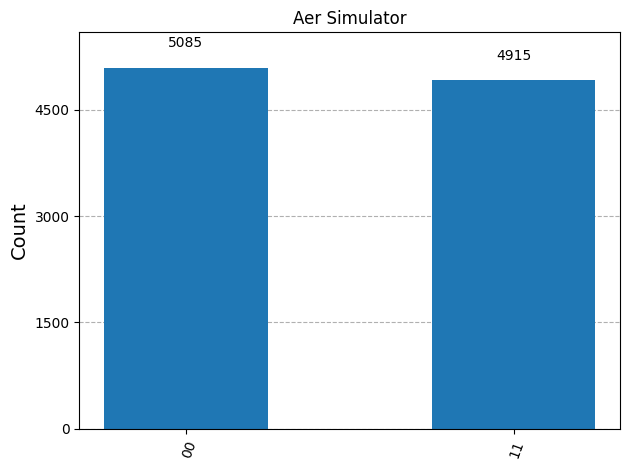

In [11]:
# Simuliere 10.000 Messungen
simulator = AerSimulator(method='statevector')
result = simulator.run(bell, shots=10000).result()

# Speicher die Messresultate
counts = result.get_counts(bell)

# Ausgabe der Messresultate
print("Messresultate:", counts)
plot_histogram(counts, color='C0', title='Aer Simulator')

In [12]:
# Speichere die Messresultate in einer Liste für späteren Vergleich
counts_list = [None] * 3
counts_list[0] = counts

### Simuliere einen IBM Quantencomputer

{'11': 4701, '00': 4673, '10': 322, '01': 304}


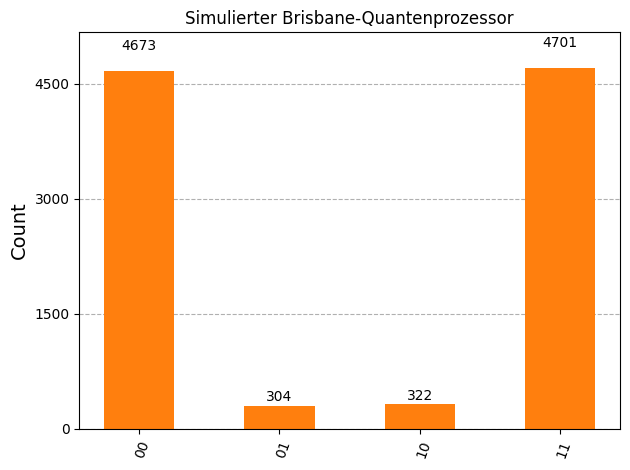

In [13]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeBrisbane

# Imitiere den Quantenprozessor Brisbane
fake_qcomp = FakeBrisbane()

# Definition des Jobs
pm = generate_preset_pass_manager(backend=fake_qcomp, optimization_level=1)
isa_qc = pm.run(bell)
sampler = Sampler(mode=fake_qcomp)
job = sampler.run([isa_qc], shots=10000).result()

# Extrahiere die Messresultate
counts = job[0].data.meas.get_counts()

# Gib die Resultate aus
print(counts)
plot_histogram(counts, color='C1', title='Simulierter Brisbane-Quantenprozessor')

In [14]:
# Berechne die Fehlerquote
# Die idealen Ergebnisse sind 00 und 11, Fehler sind 01 und 10
vals = list(counts.values())
error = (vals[2] + vals[3]) / sum(vals)
print("Fehlerquote:", error*100, "%")

Fehlerquote: 6.260000000000001 %


In [15]:
# Speichere die Messresultate in einer Liste für späteren Vergleich
counts_list[1] = counts

### Rechnung auf echtem Quantencomputer

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Ihr IBM API key
token = "<Ihr Token>"
# CRN Ihrer IBM Quantum Cloud Instanz
instance = "<Ihre Instanz>" 

QiskitRuntimeService.save_account(
    token=token, 
    instance=instance,
    overwrite=True,
    channel="ibm_cloud" # `channel` distinguishes between different account types
)
service = QiskitRuntimeService()

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-08-26 16:43:36,689: Default instance not set. Searching all available instances.


In [17]:
# Führe den Job auf einem echten Quantencomputer aus
# Wähle den am wenigsten ausgelasteten Quantencomputer aus
backend = service.least_busy(operational=True, simulator=False)
print("Wähle ",backend.name, " mit ",backend.num_qubits, "Qubits")

Wähle  ibm_brisbane  mit  127 Qubits


In [18]:
# Definition des Jobs
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(bell)
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=10000)

# Gib die Job-ID aus
print(f"job id: {job.job_id()}")

# Gib den Status des Jobs aus
job.status()

job id: d2msg9kg59ks73c6r3v0


'QUEUED'

In [19]:
job.status()

'DONE'

Messresultate: {'11': 4915, '00': 4640, '01': 284, '10': 161}


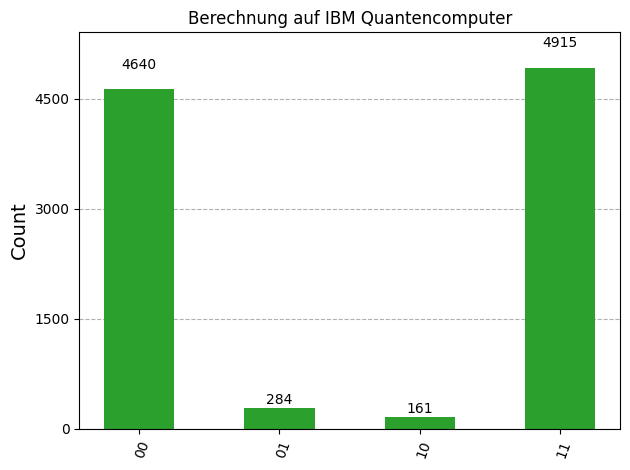

In [20]:
result = job.result()
counts = result[0].data.meas.get_counts()
print("Messresultate:", counts)
plot_histogram(counts, color='C2', title='Berechnung auf IBM Quantencomputer')

In [21]:
# Berechne die Fehlerquote
# Die idealen Ergebnisse sind 00 und 11, Fehler sind 01 und 10
vals = list(counts.values())
error = (vals[2] + vals[3]) / sum(vals)
print("Fehlerquote:", error*100, "%")

Fehlerquote: 4.45 %


In [22]:
# Speichere die Messresultate in einer Liste für späteren Vergleich
counts_list[2] = counts

### Vergleich

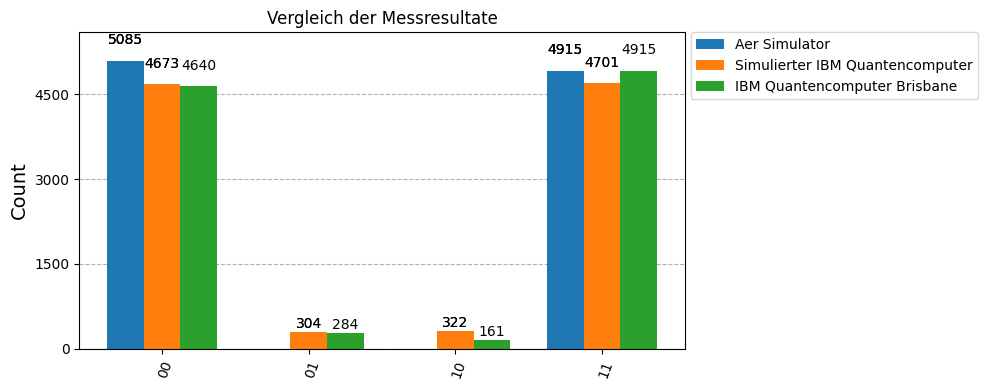

In [23]:
plot_histogram(counts_list, legend=['Aer Simulator', 'Simulierter IBM Quantencomputer', 'IBM Quantencomputer Brisbane'], title='Vergleich der Messresultate', figsize=(10, 4))